In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP de CMI

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.
1. **Optimo**

# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **GS**: Goloso secuencial.
- **GE**: Goloso expansivo.
- **GB**: Goloso Bruteforcer.
- **TS**: Tabu search.

# Experimentos
Leemos el dataframe con todos los resultados.

In [173]:
df_resultados = pd.read_csv("..\\results\\resultado.csv");
df_resultados = df_resultados[df_resultados["metodo"]=="TS"].copy()

In [174]:
agg_funcs = {   "tiempo":"mean",
                "impacto":"mean",
                "cant_colores": "mean",
                "longitud_tabu": "mean",
                "tipo_memoria": "first",
                "porcentaje_vecindad": "mean"}
df_resultados = df_resultados.groupby(['dataset','n','mG','mH','goloso_inicial']).aggregate(agg_funcs).reset_index()

In [175]:
def distancias_relativas(dataset):

    df_dataset = df_resultados[(df_resultados["dataset"] == dataset)].copy().reset_index();
    return df_dataset
    df_dataset.head()
    agg_funcs = {   "tiempo":"mean",
                    "impacto":"max",
                    "cant_colores": "mean",
                    "longitud_tabu": "mean",
                    "tipo_memoria": "first",
                    "porcentaje_vecindad": "mean"}
    print("AAAA")
    df_dataset_max = df_dataset.groupby(['dataset','n','mG','mH']).aggregate(agg_funcs).reset_index()
    print("AAAA")
    df_dataset_max = df_dataset_max.append([df_dataset_max]*2,ignore_index=True)
    df_dataset_max.head()
    print("AAAA")
    df_dataset_max = df_dataset_max.sort_values('n').reset_index()
    print("AAAA")
    df_dataset['max'] = df_dataset_max['impacto']
    print("AAAA")
    df_dataset.apply(lambda r: r['impacto'], axis=1).head()
    #df_dataset['diff_relativa'] = df_dataset.apply(lambda r: r['impacto'], axis=1)
    print("AAAA")
    return df_dataset

In [176]:
def dataplot(df):

    plt.figure(figsize=(20, 20))
    plotdata = pd.DataFrame({
        "GS":df[df['goloso_inicial']=="GS"]['impacto'].tolist(),
        "GE":df[df['goloso_inicial']=="GE"]['impacto'].tolist(),
        "GB":df[df['goloso_inicial']=="GB"]['impacto'].tolist()
        }, 
        index=df['n'].drop_duplicates().tolist()
    )
    return plotdata

In [177]:
datasets = [
    "random-denso-denso-25",
    "random-denso-denso-75",
    "random-denso-ralo-25",
    "random-denso-ralo-75",
    "random-ralo-denso-25",
    "random-ralo-denso-75",
    "random-ralo-ralo-25",
    "random-ralo-ralo-75"
]

df_datasets = {}
for dataset in datasets: 
    df_datasets[dataset] = distancias_relativas(dataset)

In [178]:
#promedio diferencias relativas
def promedioRelativo(df):
    agg_funcs = {"dataset":"first",
                 "impacto":"mean"}
    prom_dist_rel = df.groupby(['goloso_inicial']).aggregate(agg_funcs).reset_index()
    return prom_dist_rel

In [179]:
def dataplotDiffs(df):

    plt.figure(figsize=(20, 20))
    plotdata = pd.DataFrame({
        "GS":df[df['goloso_inicial']=="GS"]['impacto'].tolist(),
        "GE":df[df['goloso_inicial']=="GE"]['impacto'].tolist(),
        "GB":df[df['goloso_inicial']=="GB"]['impacto'].tolist()
        }, 
        index=df['dataset'].drop_duplicates().tolist()
    )
    return plotdata

<Figure size 1440x1440 with 0 Axes>

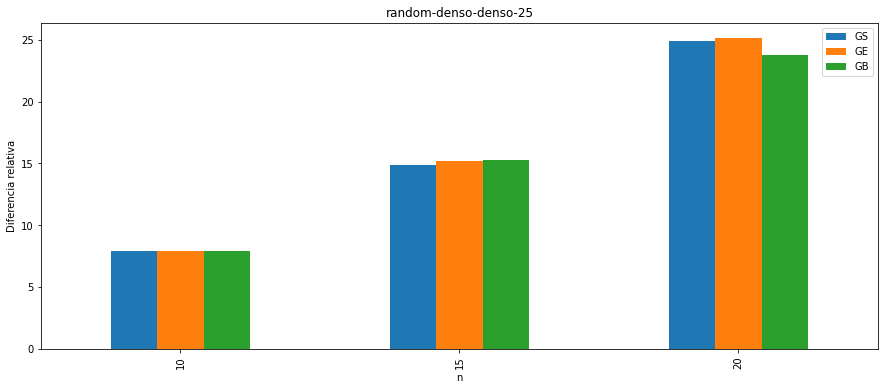

<Figure size 1440x1440 with 0 Axes>

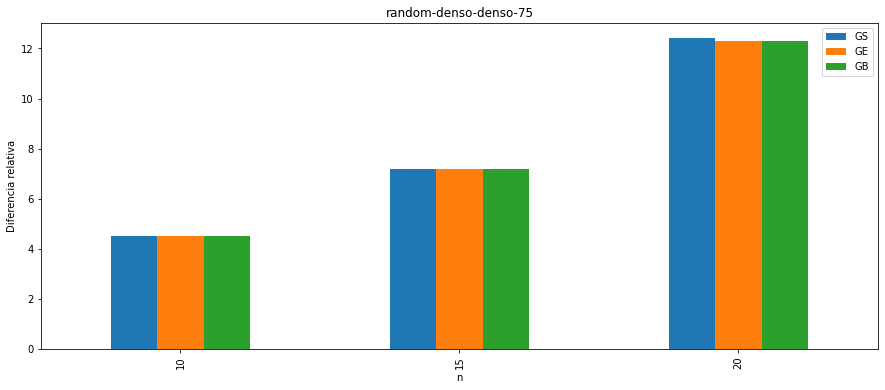

<Figure size 1440x1440 with 0 Axes>

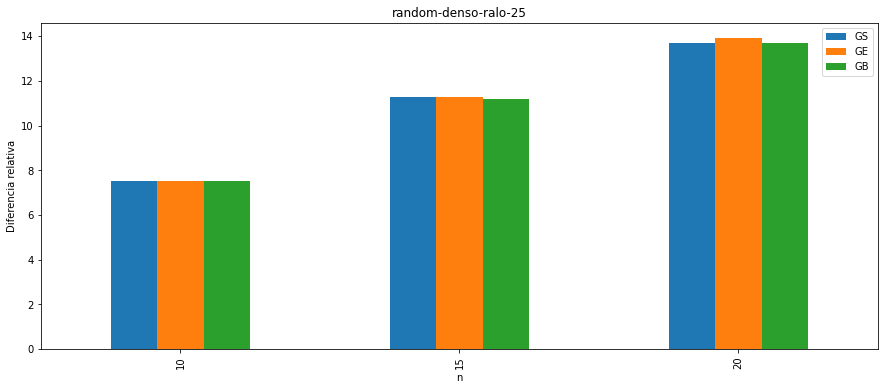

<Figure size 1440x1440 with 0 Axes>

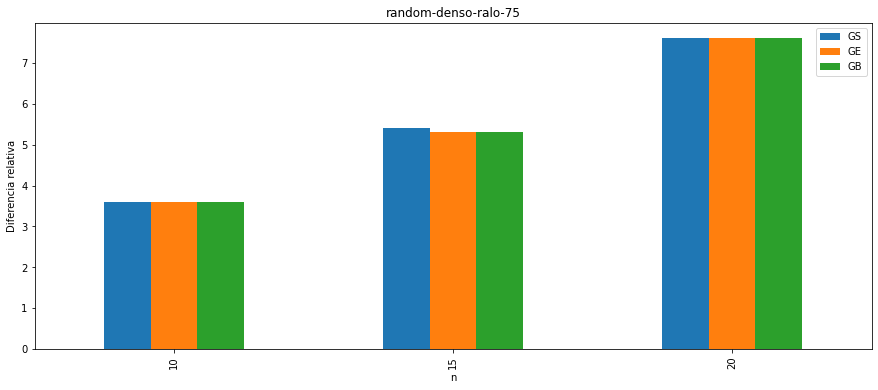

<Figure size 1440x1440 with 0 Axes>

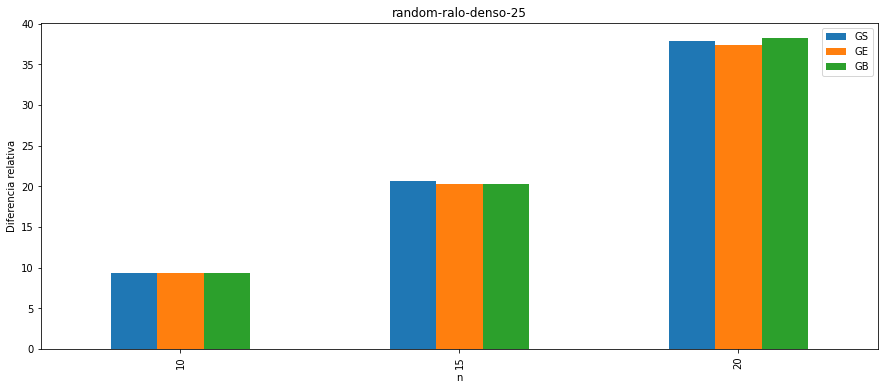

<Figure size 1440x1440 with 0 Axes>

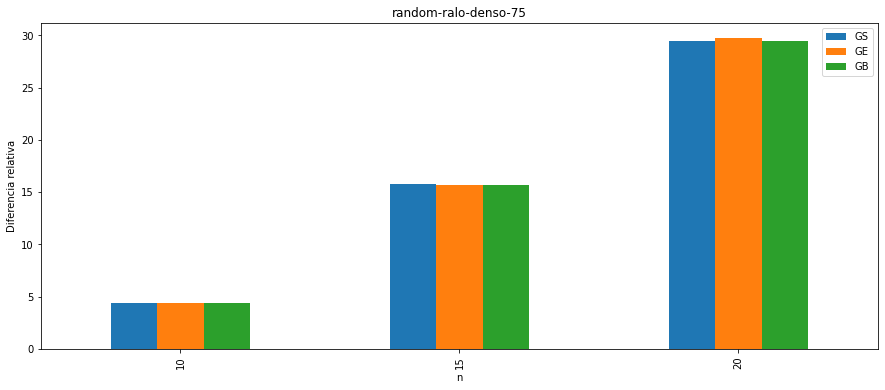

<Figure size 1440x1440 with 0 Axes>

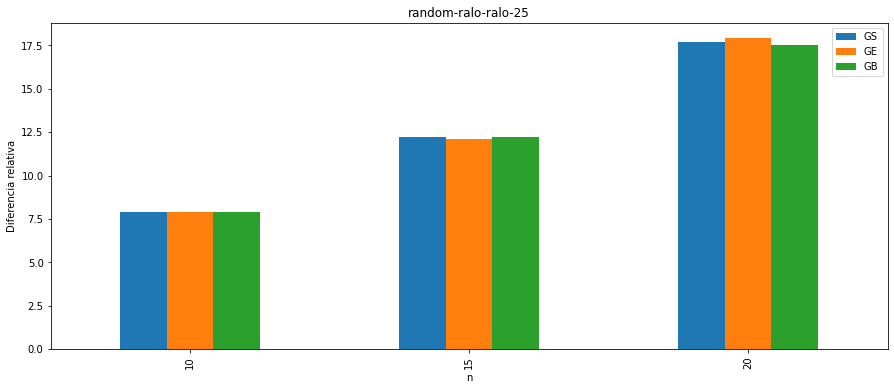

<Figure size 1440x1440 with 0 Axes>

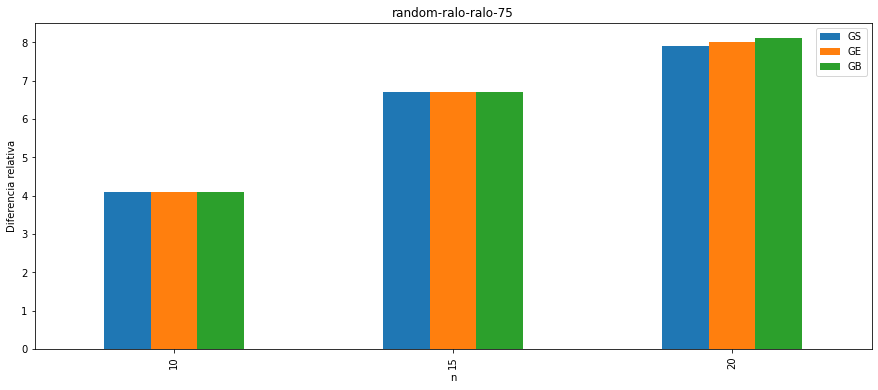

In [180]:
df = pd.DataFrame()
for dataset in datasets: 
    plotdata = dataplot(df_datasets[dataset])
    ax = plotdata.plot(kind="bar", figsize=(15,6))
    ax.set_title(dataset)
    ax.set_xlabel('n')
    ax.set_ylabel('Diferencia relativa')
    plt.savefig("..\\graficos\\" + dataset + "-relativo.svg");
    prom = promedioRelativo(df_datasets[dataset])
    #print(prom.to_latex(index=False))
    df = df.append(prom)

<Figure size 1440x1440 with 0 Axes>

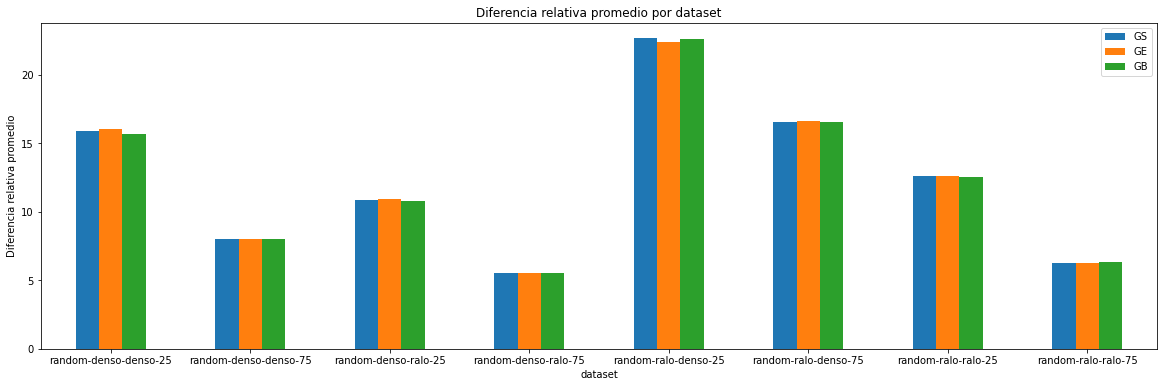

In [181]:
plotdata = dataplotDiffs(df)
ax = plotdata.plot(kind="bar", figsize=(20,6), rot=0)
ax.set_title("Diferencia relativa promedio por dataset")
ax.set_xlabel('dataset')
ax.set_ylabel('Diferencia relativa promedio')
plt.savefig("..\\graficos\\" + "diff-promedios" + "-relativo.svg");